# 都市計画道路

## ライブラリのインストール

In [38]:
pip install -r requirements.txt # type: ignore

You should consider upgrading via the '/Users/minamidaisuke/qgis/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## shapeファイルの表示

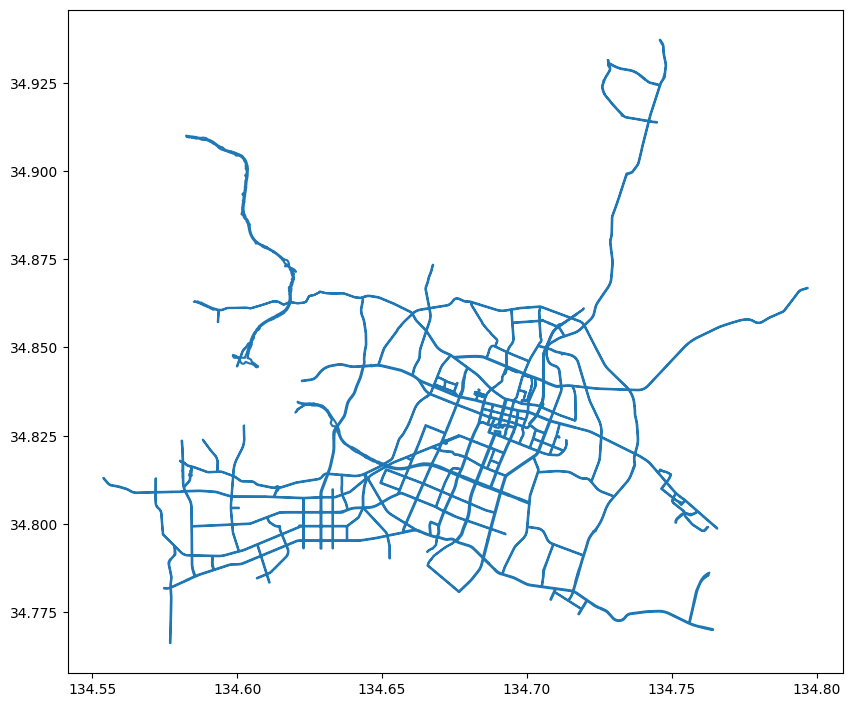

,区分,kubunID,Pref,Citycode,Cityname,当初決定日,最終告示日,決定区分,決定者,告示番号S,告示番号L
0,広場,3023,兵庫県,28201,姫路市,NaN,平成20年12月12日,None,None,NaN,姫路市告示第429号
1,広場,3023,兵庫県,28201,姫路市,NaN,平成25年3月5日,None,None,NaN,姫路市告示第62号
2,道路,3011,兵庫県,28201,姫路市,NaN,平成13年3月16日,None,None,NaN,兵庫県告示第1924号
3,道路,3011,兵庫県,28201,姫路市,NaN,平成13年3月16日,None,None,NaN,兵庫県告示第1924号
4,道路,3011,兵庫県,28201,姫路市,NaN,平成13年3月16日,None,None,NaN,兵庫県告示第1924号
...,...,...,...,...,...,...,...,...,...,...,...
423,道路,3011,兵庫県,28201,姫路市,NaN,令和2年12月25日,None,None,NaN,姫路市告示第604号
424,道路,3011,兵庫県,28201,姫路市,NaN,令和2年12月25日,None,None,NaN,姫路市告示第604号
425,道路,3011,兵庫県,28201,姫路市,NaN,令和2年12月25日,None,None,NaN,姫路市告示第604号
426,道路,3011,兵庫県,28201,姫路市,NaN,令和2年12月25日,None,None,NaN,姫路市告示第604号


In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

def display_shapefile(shapefile_path):
    # シェープファイルを読み込む
    gdf = gpd.read_file(shapefile_path)
    
    # プロットを作成
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # GeoDataFrameをプロット
    gdf.plot(ax=ax)
    
    # プロットを表示
    plt.show()

    # 属性情報をDataFrameとして取得（ジオメトリ列を除く）
    attr_df = pd.DataFrame(gdf.drop(columns='geometry'))
    
    return gdf, attr_df

# 使用例
shapefile_path = '../shape_org/28_兵庫県/28201_姫路市/28201_douro.shp'
gdf, attr_df = display_shapefile(shapefile_path)

# GeoDataFrameの情報を表示
display(attr_df)



## shapeファイルの結合

### 兵庫県で試行

shape_orgディレクトリ内にある'_douro.shp'ファイルのリストを作成する。

In [44]:
import os

def get_douro_shp_files():

    directory = '../shape_org/28_兵庫県'
    extension = '.shp'
    keyword = '_douro'
    
    file_list = []
    
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extension) and keyword in file:
                file_list.append(os.path.join(root, file))
    
    return file_list

file_list = get_douro_shp_files()
print(file_list)

['../shape_org/28_兵庫県/28212_赤穂市/28212_douro.shp', '../shape_org/28_兵庫県/28225_朝来市/28225_douro.shp', '../shape_org/28_兵庫県/28210_加古川市/28210_douro.shp', '../shape_org/28_兵庫県/28213_西脇市/28213_douro.shp', '../shape_org/28_兵庫県/28443_福崎町/28443_douro.shp', '../shape_org/28_兵庫県/28221_丹波篠山市/28221_douro.shp', '../shape_org/28_兵庫県/28208_相生市/28208_douro.shp', '../shape_org/28_兵庫県/28219_三田市/28219_douro.shp', '../shape_org/28_兵庫県/28209_豊岡市/28209_douro.shp', '../shape_org/28_兵庫県/28382_播磨町/28382_douro.shp', '../shape_org/28_兵庫県/28207_伊丹市/28207_douro.shp', '../shape_org/28_兵庫県/28203_明石市/28203_douro.shp', '../shape_org/28_兵庫県/28206_芦屋市/28206_douro.shp', '../shape_org/28_兵庫県/28218_小野市/28218_douro.shp', '../shape_org/28_兵庫県/28464_太子町/28464_douro.shp', '../shape_org/28_兵庫県/28214_宝塚市/28214_douro.shp', '../shape_org/28_兵庫県/28201_姫路市/28201_douro.shp', '../shape_org/28_兵庫県/28202_尼崎市/28202_douro.shp', '../shape_org/28_兵庫県/28216_高砂市/28216_douro.shp', '../shape_org/28_兵庫県/28205_洲本市/28205_douro.shp', '../shape_org/28

shapeファイルを結合する。

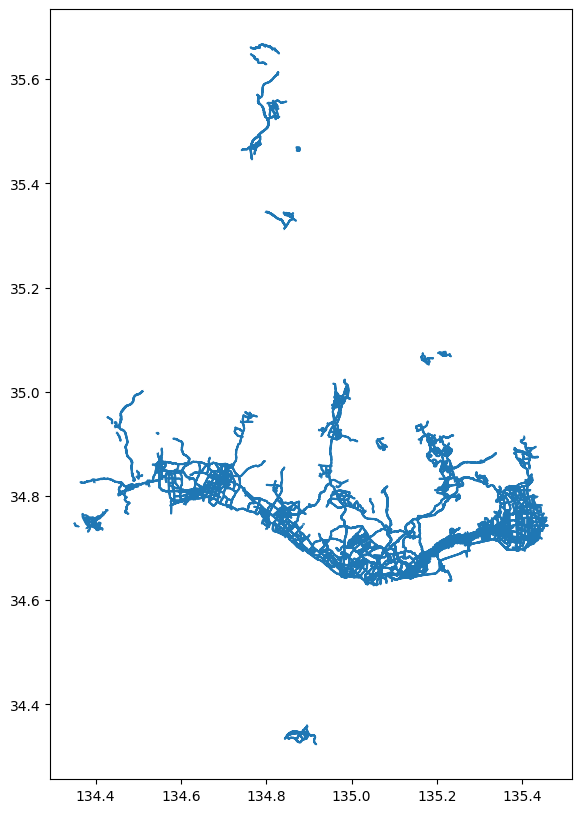

,区分,kubunID,Pref,Citycode,Cityname,当初決定日,最終告示日,決定区分,決定者,告示番号S,告示番号L
0,道路,3011,兵庫県,28212,赤穂市,NaN,None,None,None,NaN,None
1,道路,3011,兵庫県,28212,赤穂市,NaN,None,None,None,NaN,None
2,道路,3011,兵庫県,28212,赤穂市,NaN,None,None,None,NaN,None
3,道路,3011,兵庫県,28212,赤穂市,NaN,None,None,None,NaN,None
4,道路,3011,兵庫県,28212,赤穂市,NaN,None,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
7486,道路,3011,兵庫県,28217,川西市,NaN,None,None,None,NaN,兵庫県告示
7487,道路,3011,兵庫県,28217,川西市,NaN,None,None,None,NaN,兵庫県告示
7488,道路,3011,兵庫県,28217,川西市,NaN,None,None,None,NaN,兵庫県告示
7489,道路,3011,兵庫県,28217,川西市,NaN,None,None,None,NaN,兵庫県告示


In [55]:
import geopandas as gpd
import pandas as pd

def merge_shapefiles(file_list):
    gdfs = []
    for file in file_list:
        gdf = gpd.read_file(file, encoding='shift-jis')
        gdfs.append(gdf)

    merged_gdf = pd.concat(gdfs, ignore_index=True)
    
    return merged_gdf


merged_gdf = merge_shapefiles(file_list)

gdf = gpd.read_file(shapefile_path)
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)
plt.show()

# 属性情報をDataFrameとして取得（ジオメトリ列を除く）
attr_df = pd.DataFrame(gdf.drop(columns='geometry'))
display(attr_df)


### 地物の融合

In [48]:
import geopandas as gpd

# シェープファイルを読み込む
gdf = gpd.read_file('../shape_merged/douro.shp', encoding='shift-jis')

# 属性に基づいて融合
dissolved = gdf.dissolve(by=['区分', 'Pref'])

# 結果を保存
dissolved.to_file('../shape_merged/douro_dissolved.shp', encoding='shift-jis')